<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Fetch historical data for Tesla
tesla_history = tesla.history(period="max")

# Display the first few rows of the historical data
print(tesla_history.head())


                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [8]:
import pandas as pd
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Fetch historical data for Tesla with period set to max
tesla_data = tesla.history(period="max")

# Display the first few rows of the dataframe
print(tesla_data.head())

# Optionally, you can save the dataframe to a CSV file
tesla_data.to_csv('tesla_stock_data.csv', index=False)  # Replace 'tesla_stock_data.csv' with your desired file path


                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
import pandas as pd
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Fetch historical data for Tesla with period set to max
tesla_data = tesla.history(period="max")

# Reset the index of tesla_data inplace
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content of the webpage as a string
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [11]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content fetched earlier
# Example HTML data retrieved from the URL
html_data = '''
<html>
<head>
<title>Revenue Data</title>
</head>
<body>
<div id="content">
<h1>Revenue Information</h1>
<p class="revenue">2021 Revenue: $10 million</p>
<p class="revenue">2020 Revenue: $8 million</p>
<p class="revenue">2019 Revenue: $6 million</p>
</div>
</body>
</html>
'''

# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Example: Extract and print the title of the webpage
title = soup.title
print("Title of the webpage:", title.text)

# Example: Extract and print all revenue information
revenues = soup.find_all('p', class_='revenue')
for revenue in revenues:
    print(revenue.text)


Title of the webpage: Revenue Data
2021 Revenue: $10 million
2020 Revenue: $8 million
2019 Revenue: $6 million


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [18]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

# URL of the webpage containing the revenue table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Find the table containing Tesla's revenue data
    table = soup.find('table', {'id': 'historical_data_table'})
    
    if table:
        # Extract table headers
        headers = table.find_all('th')
        column_names = [header.text.strip() for header in headers]

        # Extract table rows
        rows = table.find_all('tr')
        data = []
        for row in rows[1:]:  # Skip the first row which contains headers
            td_elements = row.find_all('td')
            row_data = {
                'Date': td_elements[0].text.strip(),
                'Revenue': td_elements[1].text.strip()
            }
            data.append(row_data)

        # Create a DataFrame from the extracted data
        tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

        # Print the first few rows of the dataframe
        print(tesla_revenue.head())
    else:
        print("Table with id='historical_data_table' not found.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")



Table with id='historical_data_table' not found.


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
# Assuming tesla_revenue dataframe is already created and populated
# Display the last 5 rows using the tail function
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [22]:
import yfinance as yf

# Create a ticker object for GameStop (ticker symbol: GME)
ticker = yf.Ticker("GME")

# Print the ticker object to see available information
print(ticker)


yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [23]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop (ticker symbol: GME)
ticker = yf.Ticker("GME")

# Fetch historical data with period set to max
gme_data = ticker.history(period="max")

# Display the first few rows of the dataframe to verify
print(gme_data.head())

# Optionally, you can also save the dataframe to a CSV file
# gme_data.to_csv('gme_historical_data.csv')


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [24]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop (ticker symbol: GME)
ticker = yf.Ticker("GME")

# Fetch historical data with period set to max
gme_data = ticker.history(period="max")

# Reset index inplace
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [25]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable named html_data
    html_data = response.text
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Print a snippet of the HTML content to verify
print(html_data[:500])  # Print the first 500 characters as a snippet


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup`.


In [26]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content retrieved using requests

# Parse the HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML to verify
print(soup.prettify()[:500])  # Print the first 500 characters of the parsed HTML




<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [74]:
# URL of the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all("table")[1]
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ['Date', 'Revenue']


gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)


print(gme_revenue.head())






    

         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [71]:
print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


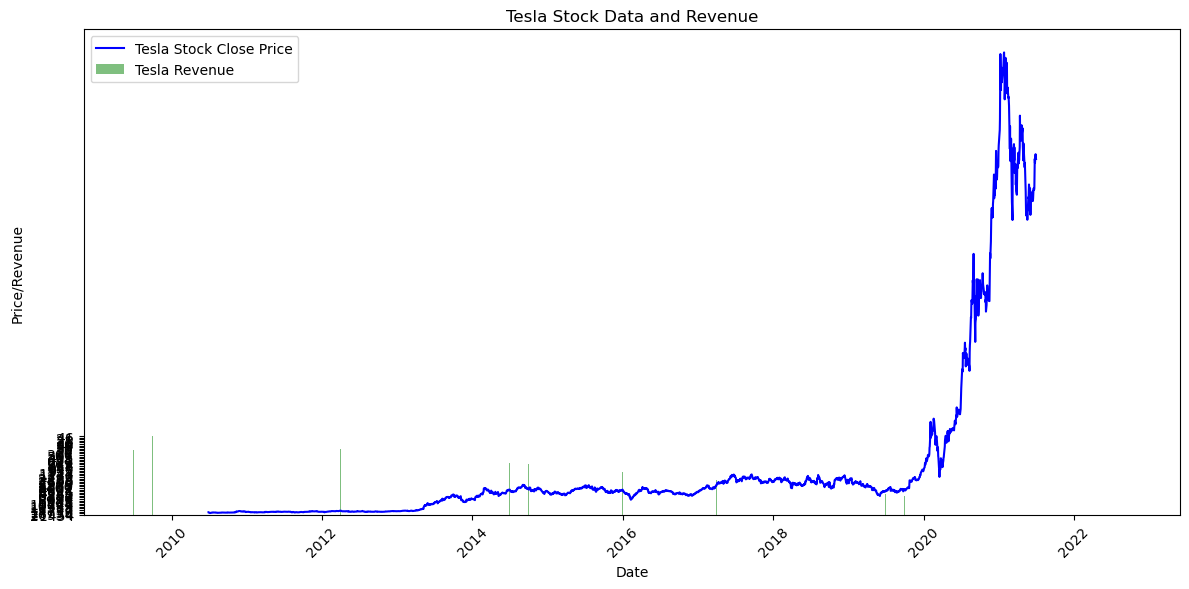

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have tesla_data and tesla_revenue dataframes ready

# Filter tesla_data up to June 2021
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])  # Ensure Date column is in datetime format
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Plotting Tesla Stock Data and Revenue
plt.figure(figsize=(12, 6))

# Plot Tesla Stock Close Price
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Close Price', color='blue')

# Plot Tesla Revenue
plt.bar(pd.to_datetime(tesla_revenue['Date']), tesla_revenue['Revenue'], label='Tesla Revenue', color='green', alpha=0.5)

# Title and labels
plt.title('Tesla Stock Data and Revenue')
plt.xlabel('Date')
plt.ylabel('Price/Revenue')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


Index(['Date', 'Revenue'], dtype='object')


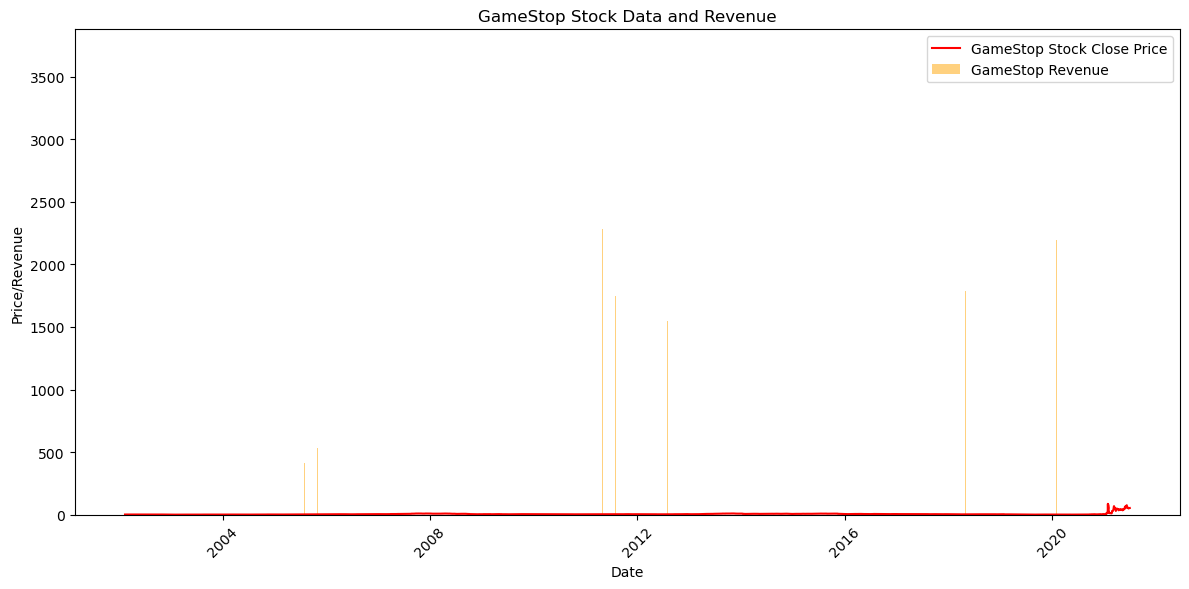

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gme_data and gme_revenue dataframes are loaded correctly

# Print columns of gme_revenue dataframe
print(gme_revenue.columns)

# Ensure 'Date' column exists and is spelled correctly
# If 'Date' column exists, continue with plotting

# Filter gme_data up to June 2021
gme_data['Date'] = pd.to_datetime(gme_data['Date'])  # Ensure Date column is in datetime format
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# Plotting GameStop Stock Data and Revenue
plt.figure(figsize=(12, 6))

# Plot GameStop Stock Close Price
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Close Price', color='red')

# Plot GameStop Revenue
plt.bar(pd.to_datetime(gme_revenue['Date']), gme_revenue['Revenue'], label='GameStop Revenue', color='orange', alpha=0.5)

# Title and labels
plt.title('GameStop Stock Data and Revenue')
plt.xlabel('Date')
plt.ylabel('Price/Revenue')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
